# Key Route Analysis: Pitsea - Benfleet

c2c are interested in train running times between Pitsea and Benfleet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%store -r train_timings

# grab data associated with pitsea and benfleet
pitsea_benfleet_events = train_timings.loc[(train_timings.planned_event_location == '51016') | (train_timings.planned_event_location == '51014')]

# print('There are ' + str(len(pitsea_benfleet_events.signal.unique())) + ' signals at the pitsea or benfleet stations')
# there are 18 signals at the pitsea or benfleet stations...

# only those which arrive at benfleet and depart pitsea are valid
pitsea_to_benfleet = pitsea_benfleet_events.loc[~(((pitsea_benfleet_events.planned_event_type == 'ARRIVAL')&(pitsea_benfleet_events.planned_event_location == '51016'))|((pitsea_benfleet_events.planned_event_type == 'DEPARTURE')&(pitsea_benfleet_events.planned_event_location == '51014')))]

# sort on date and train id
pitsea_to_benfleet.sort_values(['signal_date', 'train_id'], inplace=True)
pitsea_to_benfleet.reset_index(drop=True, inplace=True)

# get previous and next train id.. save rows whose train_id is same as previous and arrive at benfleet.. and save rows whose train id is same as next train_id and depart pitsea
# this isnt a perfect science but it will work for the purposes of analysis
# attempted to do this by tracking previous signal ids but was too difficult.
pitsea_to_benfleet['previous_train_id'] = pitsea_to_benfleet['train_id'].shift(+1)
pitsea_to_benfleet['next_train_id'] = pitsea_to_benfleet['train_id'].shift(-1)
pitsea_to_benfleet = pitsea_to_benfleet.loc[((pitsea_to_benfleet['train_id']==pitsea_to_benfleet['previous_train_id'])&(pitsea_to_benfleet['planned_event_type']=='ARRIVAL'))|((pitsea_to_benfleet['train_id']==pitsea_to_benfleet['next_train_id'])&(pitsea_to_benfleet['planned_event_type']=='DEPARTURE')), :]

# gather additional metrics for analysis
pitsea_to_benfleet['previous_planned_event_time'] = pitsea_to_benfleet['planned_event_time'].shift(+1)
pitsea_to_benfleet['planned_run_time'] = pitsea_to_benfleet.loc[pitsea_to_benfleet['planned_event_type'] == 'ARRIVAL']['planned_event_time'] - pitsea_to_benfleet.loc[pitsea_to_benfleet['planned_event_type'] == 'ARRIVAL']['previous_planned_event_time']

pitsea_to_benfleet['previous_actual_event_time'] = pitsea_to_benfleet['actual_event_time'].shift(+1)
pitsea_to_benfleet['actual_run_time'] = pitsea_to_benfleet.loc[pitsea_to_benfleet['planned_event_type'] == 'ARRIVAL']['actual_event_time'] - pitsea_to_benfleet.loc[pitsea_to_benfleet['planned_event_type'] == 'ARRIVAL']['previous_actual_event_time']

pitsea_to_benfleet['actual_vs_planned'] = (pitsea_to_benfleet['actual_run_time'] - pitsea_to_benfleet['planned_run_time']).dt.total_seconds()
# drop columns we dont need
pitsea_to_benfleet.drop(['previous_planned_event_time', 'previous_actual_event_time'], axis=1, inplace=True)

# eliminate outliers by runtime, anything over 400 seconds
pitsea_to_benfleet.drop(pitsea_to_benfleet[pitsea_to_benfleet['actual_run_time'].dt.total_seconds() > 500].index, inplace = True)
pitsea_to_benfleet.reset_index(drop=True, inplace=True)

/Users/ivan/opt/anaconda3/envs/3.7/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/Users/ivan/opt/anaconda3/envs/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/ivan/opt/anaconda3/envs/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [2]:
# we will do the same as described above.. just incase we need it at some point

benfleet_to_pitsea = pitsea_benfleet_events.loc[~(((pitsea_benfleet_events.planned_event_type == 'ARRIVAL')&(pitsea_benfleet_events.planned_event_location == '51014'))|((pitsea_benfleet_events.planned_event_type == 'DEPARTURE')&(pitsea_benfleet_events.planned_event_location == '51016')))]

benfleet_to_pitsea.sort_values(['signal_date', 'train_id'], inplace=True)
benfleet_to_pitsea.reset_index(drop=True, inplace=True)

benfleet_to_pitsea['previous_train_id'] = benfleet_to_pitsea['train_id'].shift(+1)
benfleet_to_pitsea['next_train_id'] = benfleet_to_pitsea['train_id'].shift(-1)
benfleet_to_pitsea = benfleet_to_pitsea.loc[((benfleet_to_pitsea['train_id']==benfleet_to_pitsea['previous_train_id'])&(benfleet_to_pitsea['planned_event_type']=='ARRIVAL'))|((benfleet_to_pitsea['train_id']==benfleet_to_pitsea['next_train_id'])&(benfleet_to_pitsea['planned_event_type']=='DEPARTURE')), :]

benfleet_to_pitsea['previous_planned_event_time'] = benfleet_to_pitsea['planned_event_time'].shift(+1)
benfleet_to_pitsea['planned_run_time'] = benfleet_to_pitsea.loc[benfleet_to_pitsea['planned_event_type'] == 'ARRIVAL']['planned_event_time'] - benfleet_to_pitsea.loc[benfleet_to_pitsea['planned_event_type'] == 'ARRIVAL']['previous_planned_event_time']

benfleet_to_pitsea['previous_actual_event_time'] = benfleet_to_pitsea['actual_event_time'].shift(+1)
benfleet_to_pitsea['actual_run_time'] = benfleet_to_pitsea.loc[benfleet_to_pitsea['planned_event_type'] == 'ARRIVAL']['actual_event_time'] - benfleet_to_pitsea.loc[benfleet_to_pitsea['planned_event_type'] == 'ARRIVAL']['previous_actual_event_time']

benfleet_to_pitsea['actual_vs_planned'] = (benfleet_to_pitsea['actual_run_time'] - benfleet_to_pitsea['planned_run_time']).dt.total_seconds()

benfleet_to_pitsea.drop(['previous_planned_event_time', 'previous_actual_event_time'], axis=1, inplace=True)

# eliminate outliers by runtime, anything over 400 seconds
benfleet_to_pitsea.drop(benfleet_to_pitsea[benfleet_to_pitsea['actual_run_time'].dt.total_seconds() > 400].index, inplace = True)


/Users/ivan/opt/anaconda3/envs/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/ivan/opt/anaconda3/envs/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":


## Pitsea to Benfleet: Train Running Times

### Distribution of train running times

<AxesSubplot:ylabel='Count'>

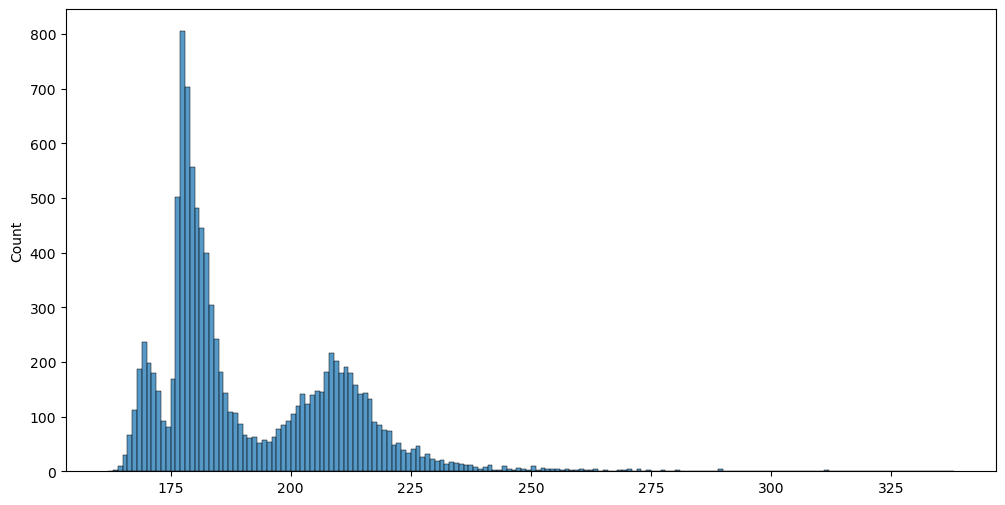

In [5]:
pitsea_to_benfleet_runtimes = pitsea_to_benfleet.actual_run_time.dt.total_seconds().values[~np.isnan(pitsea_to_benfleet.actual_run_time.dt.total_seconds().values)]
pitsea_to_benfleet_runtimes
# print(max(pitsea_to_benfleet_runtimes))

fig, ax1 = plt.subplots(figsize=(12,6))
sns.histplot(data=pitsea_to_benfleet_runtimes, binwidth=1)

We can see that the majority of runtimes take around 180 seconds. There are two other clusters of runtimes which are centered around the 150 seconds and 210 second areas. The distribution is skewed to the right. 

In [7]:
# we will get day of week and time metrics in format that seaborn can understand
pitsea_to_benfleet.planned_run_time.unique()/ np.timedelta64(1, 'm')
pitsea_to_benfleet['weekday'] = pitsea_to_benfleet['signal_date'].dt.dayofweek
pitsea_to_benfleet['planned_run_time_seconds'] = pitsea_to_benfleet['planned_run_time'].dt.total_seconds()
pitsea_to_benfleet = pitsea_to_benfleet.astype({"actual_vs_planned": int, "planned_run_time_seconds": int}, errors='ignore')
pitsea_to_benfleet = pitsea_to_benfleet.astype({"planned_run_time_seconds": int}, errors='ignore')

### Pitsea to Benfleet Train Running Times by Planned Run Time, Day of Week and Time of Day

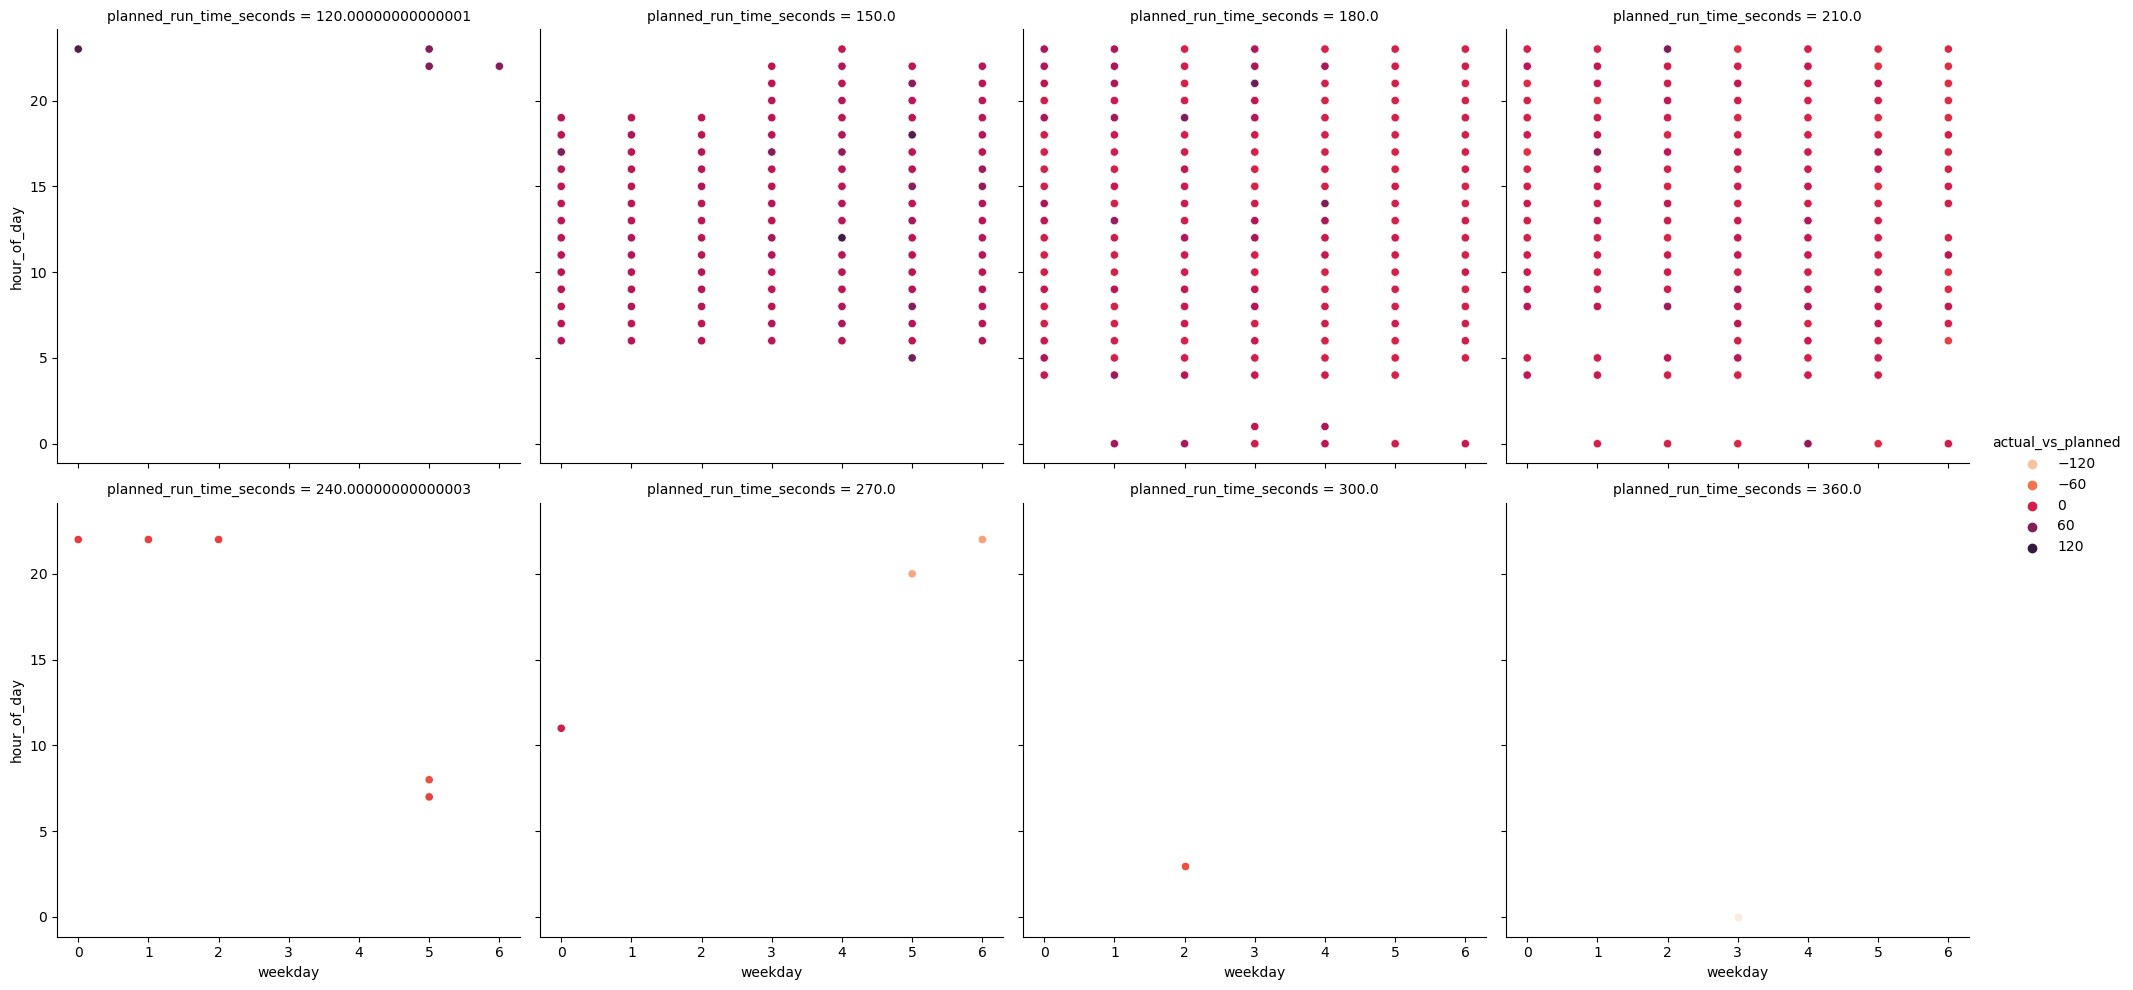

In [8]:
sns.relplot(
    data=pitsea_to_benfleet, x="weekday", y="hour_of_day",
    col="planned_run_time_seconds", col_wrap=4, hue="actual_vs_planned",
    kind="scatter", palette='rocket_r'
)

If the above graph is hard to read, you can right click and open in new tab.  

We can see that the majority of trains are planned to arrive between 150, 180 and 210 second run times which correspond to the three peaks we saw above.  
The 150 second journeys have a stricter start time (6am) than the 180 and 210 second run times, meaning they are probably catered specifically for commuters.  
We can see that there are far more delayed journeys for thr 150 second run time compared to 180, 210 seconds, with the 210 second run time looking most appropriate.

120 second planned run times are far too quick, with all trains being too slow to meet the planned arrival time.  
The planned run times which are in the 270 second bracket seem like they could be adjusted to arrive 1-2 minutes earlier as they are ahead of time on Saturday and Sunday evening.

### Recommendation

We would recommend for c2c to adjust the planned run time for all trains for the Pitsea to Benfleet journey to **180 - 210 seconds**. Trains planned to be faster than this time are **more likely to be late**. Trains planned to be later than this running time are harder to judge but could also be adjusted to suit this time.

In [6]:
#factorize values to see if correlations exist

#tried using a heatmap to see what influences train times but nothing really to take from it..
#can try again sometime or with a smaller subset of data

# pitsea_to_benfleet['train_id_fact'] = pd.factorize(pitsea_to_benfleet['train_id'])[0]
# pitsea_to_benfleet['train_id_fact'] = pd.factorize(pitsea_to_benfleet['train_id'])[0]
# pitsea_to_benfleet['day_of_week_fact'] = pd.factorize(pitsea_to_benfleet['day_of_week'])[0]
# pitsea_to_benfleet['previous_signal_fact'] = pd.factorize(pitsea_to_benfleet['previous_signal'])[0]
# pitsea_to_benfleet['planned_run_time_fact'] = pd.factorize(pitsea_to_benfleet['planned_run_time'])[0]

# # sns.heatmap(pitsea_to_benfleet.loc[pitsea_to_benfleet['planned_event_type'] == 'ARRIVAL'].corr())
# sns.heatmap(pitsea_to_benfleet.loc[pitsea_to_benfleet['planned_event_type'] == 'ARRIVAL'].corr())
# pitsea_to_benfleet.loc[pitsea_to_benfleet['planned_event_type'] == 'ARRIVAL'].corr()

In [156]:
# didnt need these in the end but left it here incase needed in future

# pitsea_to_benfleet_360s = pitsea_to_benfleet.loc[pitsea_to_benfleet['planned_run_time'] == '0 days 00:06:00']
# pitsea_to_benfleet_300s = pitsea_to_benfleet.loc[pitsea_to_benfleet['planned_run_time'] == '0 days 00:05:00']
# pitsea_to_benfleet_270s = pitsea_to_benfleet.loc[pitsea_to_benfleet['planned_run_time'] == '0 days 00:04:30']
# pitsea_to_benfleet_240s = pitsea_to_benfleet.loc[pitsea_to_benfleet['planned_run_time'] == '0 days 00:04:00']
# pitsea_to_benfleet_210s = pitsea_to_benfleet.loc[pitsea_to_benfleet['planned_run_time'] == '0 days 00:03:30']
# pitsea_to_benfleet_180s = pitsea_to_benfleet.loc[pitsea_to_benfleet['planned_run_time'] == '0 days 00:03:00']
# pitsea_to_benfleet_150s = pitsea_to_benfleet.loc[pitsea_to_benfleet['planned_run_time'] == '0 days 00:02:30']
# pitsea_to_benfleet_120s = pitsea_to_benfleet.loc[pitsea_to_benfleet['planned_run_time'] == '0 days 00:02:00']